# Benchmarking against exact results

By generating the set of spin configurations for a given N and computing their energies and degeneracies, one can construct the exact partition function $\mathcal{Z}_N(\beta)$. From this function, one can recover all the physics we are interested in. We only attempt to do so for small $N$, specficially $N \in \{2,3,4\}$. Simple things to compare are the energy space Monte Carlo histrograms with the exact probabiltiy distribution given by 
\begin{eqnarray}
p(E_k)=\mathcal{Z}^{-1}\,\Omega(E_k)\,\exp(-\beta E_k)
\end{eqnarray}
Other simple measurements are the average energy and magnetziation vs temperature.

## Effective sample size and error of observable averages

Given the central limit theorem, $\bar{X}_n \sim \mathcal{N}(\mu,\frac{\sigma^2}{n})$, Monte Carlo averages are eexpected to be normalliy distrubted. We can then put bounds on the results of our Monte Carlo averages using $95\%$ confidence intervals: $\displaystyle \bar{X} \pm 1.96 \frac{\sigma}{\sqrt{n}}$. But, this only holds for a set of $n$ uncorrelated observations. For correlated observations, we take $n \to n_{\text{eff}}$ where the autocorrelation length reduces the effective sample size. 

To account for the correlations, one can either determine how to compute $n_{\text{eff}}$ or, do two MC runs - the first determines $\tau$, while the second takes sweeps large enough to encompass $\tau$ and produce uncorrelated observations (which can be checked by checking that $\tau \approx 1$ ).

But, we don't know $\sigma^2$. So, we estimate the variance using the sample variance (of $n-1$ degrees of freedom ) - $\sigma^2 \to s^2=\frac{1}{n-1}\sum_i \left( X_i-\bar{X} \right)^2$. Our new confidence intervals become 
$$\bar{X} \pm t_{\alpha/2} \, \frac{s}{\sqrt{n}}$$ 
where $\alpha=0.05$ and $t_{\alpha/2}$ is defined such that Prob$(t < t_{\alpha/2})=\alpha/2$ via the $t_{\nu=n-1}$-distribution. Note that for very large sample sizes, $n>>1$, we have $t_{\alpha/2}\approx 1.96$ for $\alpha=.05$. This will be the case for our Monte Carlo results, yielding
$$\bar{X} \pm 1.96 \, \frac{s}{\sqrt{n}}$$ 

### Effect of autocorrelations:

The presence of autocorrelations within a sample adds a multiplicative factor to the variance of the sample mean, Var$(\bar{X}) \approx 2*\tau_{\text{exp}}\frac{s^2}{n}$. Yielding the interval
$$\bar{X} \pm 1.96 * \sqrt{\frac{2\tau_{\text{exp}}\,s^2}{n}}$$ 
Since measurements are a computational expense and somewhat inefficient in the presence of autocorrelations, one can instead measure every handful of sweeps $n$ such that $n \le \tau$. The error associated with measurements from the two sets should be roughly equivalent - a trade off between sample size and correlation length.

## Errors of non-linear functions of random variables:

1. Batching, Jackknife, Bootstrap

## Computing autocorrelation time

Some things need to be said about autocorrelation. Due to the procedure for configuration generation, the configurations are not statistically independent. The degree to which nearby configurations are correlated is measured by the correlation time. Two measures we explore are integrated and (more loosely) the exponential corrrelation times. Furthermore, the correlation time depends on system parameters. Near the Ising critical point, we expect $\tau$ to diverge for single-spin flip updates. Additionally, given the single spin nature of the Metropolis-Hastings algorithm, the number of steps required to generate an uncorrelated configuration should scale as a function of $N$.

A common definition of the population and sample autocovariance is 
\begin{eqnarray}
C(\tau)&=&\text{Cov}(X_t,X_{t+\tau}) \\
\hat{C}(\tau)&=&\frac{1}{(n-\tau)}\sum_{i=1}^{n-t}\left(X_i-\bar{X}\right)\left(X_{i+\tau}-\bar{X}\right)
\end{eqnarray}
We then use the normalized autocorrelation functions by using the fact that $C(0)=\sigma^2$ and similarly for the estimator $\hat{C}$. We define
\begin{eqnarray}
\rho(t)&=&\frac{C(t)}{C(0)}=\frac{C(t)}{\sigma^2} \\
\hat{\rho}(t)&=&\frac{\hat{C}(t)}{s^2}
\end{eqnarray}
where $s^2 \sim \frac{1}{n}$. We use two measures of the autocorrelation time:
\begin{eqnarray}
%%\tau_{int} &=& \frac{1}{t}\int_0^{\infty} \rho(t) \, dt \\
\tau_{int} &=& 1 +2 \sum_{n=0}^{\infty} \rho(t_n) \\
\tau_{\text{exp}} &=& -\text{inf}_t\{ t : \rho(t)<e^{-1} \}
\end{eqnarray}
For the exponential correlation time, we equivalently expect the form $ \displaystyle \rho(t) \sim e^{-t/\tau}$. Notice that we can define $\tau_{\text{int}}(t)$ by simply replacing integral upper limit with $t$.

A important point to make is that the correlation time does depend on the function of which we are taking expectations. However, theorectically they should all be related. We will look at the magnetization and the energy correlation times.

The following formulas are useful:
\begin{eqnarray}
\text{Var}\left( \bar{X}_n \right)&=&\frac{1}{n}\text{Var}(X)\left(1+\frac{2}{n}\sum_{i=1}^n\sum_{j>i }\frac{\text{Cov}(X_i,X_j)}{\text{Var}(X)} \right) \\
&=&\frac{1}{n}\text{Var}(X)\left(1+\frac{2}{n}\sum_{i=1}^n\sum_{j>i }\, \rho(X_i,X_j) \right) \\
&=&\frac{1}{n}\text{Var}(X)\left(1+2\sum_{t=1}^{n-1}\frac{n-t}{n} \rho(t) \right)
\end{eqnarray}
In the case of independent identically distributed variables, $\rho(t)=0$ and we recover the usual Var$\displaystyle (\bar{X})=\frac{\sigma^2}{n}$. The effect of autocorrelation reduces the _effective sample size_ - $n_{\text{eff}}=\frac{n}{\alpha}$ where $\alpha=\left(1+2\sum_{t=1}^{n-1}\frac{n-t}{n} \rho(t) \right)$. 

Ultimately, the correlation time measures the efficiency of an algorithm. We expect to see that the Wolff algortihm has a much smaller correlation time.

## Autocorrelation functions

In [ ]:
import scipy

def auto_corr(x): ## scipy signal.correlate is signifcantly faster than 
    #                 numpy's correlate which is significantly faster than hand-made code
    l = len(x)
    avg = np.mean(x)
    var = np.var(x)
    x = [i-avg for i in x]
    #acov = np.correlate(x,x,"full")[l-1:]
    auto_covariance = scipy.signal.correlate(x,x,"full")[l-1:]
    return auto_covariance/(l*var)

def exp_corr_len(x):
    def comp(s):
        if s > np.exp(-1):
            return 0
        else:
            return 1
    partition = [comp(i) for i in x]
    return partition.index(1)  


def int_corr_time_set(x, t_lag): 
    ## Integrated corr time. Since auto_corrs are computed all at once, 
    ##   compute correlations time all at once
    l = len(x)
    avg = np.mean(x)
    var = np.var(x)
    x = [i-avg for i in x]
    auto_covariance = scipy.signal.correlate(x, x, "full")[l-1: ]
    #auto_covariance = np.correlate(x, x, "full")[l-1: ]
    auto_correlation = [ 1 + 2*np.sum(auto_covariance[:i+1])/(l*var)  for i in range(t_lag-1)]
    return np.array([1] + auto_correlation)

## N=4 energy histrograms, correlation length at $T=3,H=1$

Computation time = 16.084428787231445
Energy list:  [-48.0, -38.0, -32.0, -28.0, -26.0, -24.0, -22.0, -20.0, -18.0, -16.0, -14.0, -12.0, -10.0, -8.0, -6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 26.0, 32.0]
Mag. corr. length:  1.75 , and E. corr. length:  1.6875
avg energy: E = -40.0807 +- 0.0269
mean energy: E = -39.9941
avg magnetization: E[|m|] = 0.8845 +- 0.0005


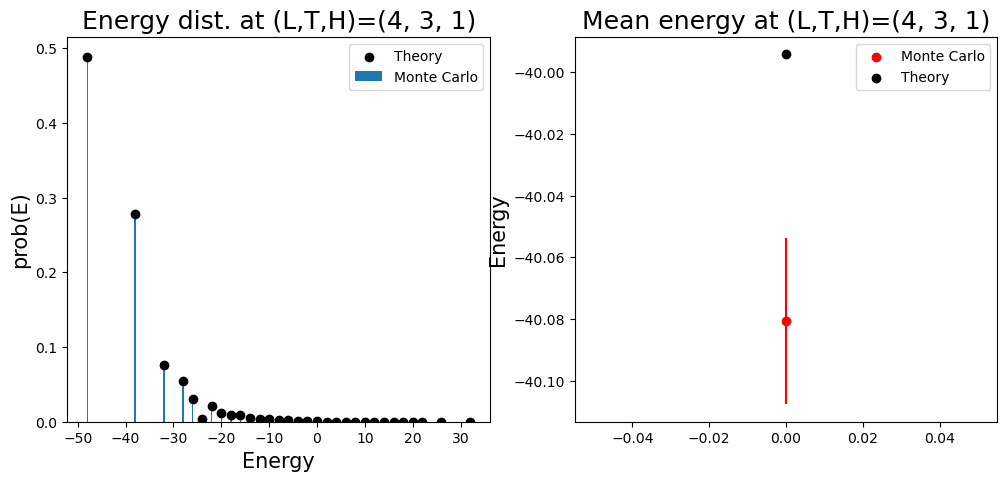

In [ ]:
L,T,H = 4, 3, 1
beta = 1/T
N_sites = L**2
N_burnin = 400*N_sites
N_iterations = 10**5*N_sites

t0 = time()
trace = Metropolis_update(hotstart(L), beta, H, N_burnin + N_iterations)
trace = trace[N_burnin:]

Mag_data = np.abs(trace[:,0])/N_sites
l_m = exp_corr_len(auto_corr(Mag_data))/N_sites

E_data = trace[:,1]
l_e = exp_corr_len(auto_corr(E_data))/N_sites

## compute histrogram and exact probablities
elist = [Ham(M,H) for M in config_gen(L)]
eset = sorted(set(elist))
degeneracies = np.array([ (e, elist.count(e)) for e in eset])

partition_function = np.sum([np.exp(-1/T*e) for e in elist ])
prob_set = np.zeros_like(eset)
for i,e in enumerate(eset):
    j = np.where(degeneracies[:,0] == e)[0][0]
    degen = degeneracies[j][1]
    prob_set[i] = partition_function**(-1)*degen*np.exp(-1/T*e)

E_mean = np.sum( [e*p for e,p in zip(eset,prob_set)] )

E_data = np.round(E_data,5)  ## Rounding off errors induced by non-zero H. Not sure-fire but works for now

bars = np.array([list(E_data).count(e) for e in eset])/len(E_data)
E_avg = np.mean(E_data)
E_svar = 2*l_e*np.var(E_data, ddof=1)/len(E_data)
E_err = 1.96*np.sqrt(E_svar)

Mag_avg = np.mean(Mag_data)
Mag_svar = 2*l_m*np.var(Mag_data, ddof = 1)/len(Mag_data)
Mag_err = 1.96*np.sqrt(Mag_svar)

print("Computation time =", time()-t0)
print("Energy list: ", eset)
print("Mag. corr. length: ", l_m,", and E. corr. length: ",l_e)
print("avg energy: E = {:.4f} +- {:.4f}".format(*[E_avg,E_err]))
print("mean energy: E = {:.4f}".format(E_mean))
print("avg magnetization: E[|m|] = {:.4f} +- {:.4f}".format(*[Mag_avg,Mag_err]))
#print("mean magnetization: <E>={:.4f}".format(Mag_mean))

fig, ax = plt.subplots(1,2 , figsize=(12, 5))
ax[0].bar(eset, bars, width = .3, label="Monte Carlo")
ax[0].scatter(eset,prob_set, color = "black", label = "Theory") 
ax[0].legend()
ax[0].set_xlabel("Energy",fontsize = 15) 
ax[0].set_ylabel("prob(E)" ,fontsize = 15)
ax[0].set_title(f"Energy dist. at (L,T,H)={(L,T,H)}", fontsize=18)

ax[1].scatter([0],[E_avg], color="red", label=f"Monte Carlo") 
ax[1].scatter([0],[E_mean], color="black", label=f"Theory") 
ax[1].errorbar([0],[E_avg], yerr=E_err, linestyle="None", color='red')
ax[1].legend()
ax[1].set_ylabel("Energy" ,fontsize=15)
ax[1].set_title(f"Mean energy at (L,T,H)={(L,T,H)}", fontsize=18)
plt.show()

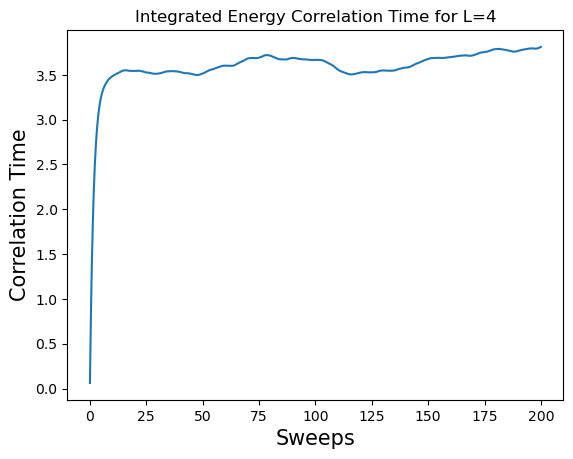

In [ ]:
time_stop=200*N_sites
tau_set=int_corr_time_set(E_data,time_stop)/N_sites
fig, ax = plt.subplots(1,1)
ax.plot(np.arange(time_stop)/N_sites,tau_set)
#ax.plot(range(time_stop),np_corr_time_set(E_data,time_stop), color="g") 
ax.set_xlabel("Sweeps",fontsize=15) 
ax.set_ylabel("Correlation Time" ,fontsize=15)
plt.title(f"Integrated Energy Correlation Time for L={L}")
plt.show()

# Autocorrelations for the Metropolis-Hastings algorithm:

In [ ]:
L,T,H = 16, 3, 0
N_sites = L**2
N_burnin = 400*N_sites
N_iterations = 2*10**4*N_sites

t0 = time()
trace = Metropolis_update(hotstart(L), beta, H, N_burnin + N_iterations)
print("time:", time()-t0)

time: 37.513089179992676


In [ ]:
t0 = time()
Mag_autocorr = auto_corr(trace[:,0])
E_autocorr = auto_corr(trace[:,1])
t1 = time()
print(f"Total computation time: {t1-t0}")

Total computation time: 2.0617339611053467


Magnetic correlation length is  12.88671875 , and Energy correlation length is 1.796875


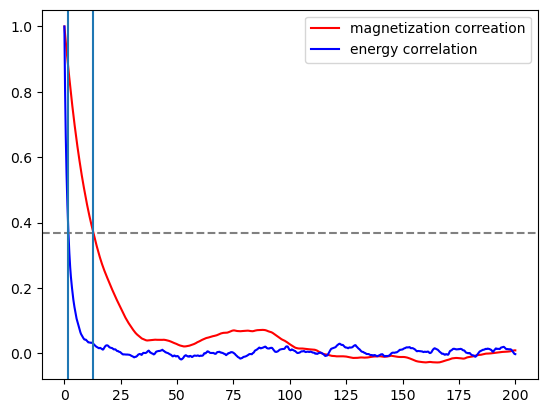

In [ ]:
time_stop = 200*N_sites
l_m = exp_corr_len(Mag_autocorr[:time_stop])/N_sites
l_e = exp_corr_len(E_autocorr[:time_stop])/N_sites
print(f"Magnetic correlation length is ", l_m, r", and Energy correlation length is", l_e)

xrange = np.arange(time_stop)/N_sites
labels = ["magnetization correation", "energy correlation"]
fig, ax = plt.subplots(1,1)
ax.plot(xrange, Mag_autocorr[:time_stop], color="red")
ax.plot(xrange, E_autocorr[:time_stop], color="blue")
ax.axhline(np.exp(-1), linestyle='--', color='0.5')
ax.axvline(l_m)
ax.axvline(l_e)
plt.legend(labels)
plt.show()

In [ ]:
Mag_corr_time_set = int_corr_time_set(trace[:,0], time_stop)
E_corr_time_set = int_corr_time_set(trace[:,1], time_stop)

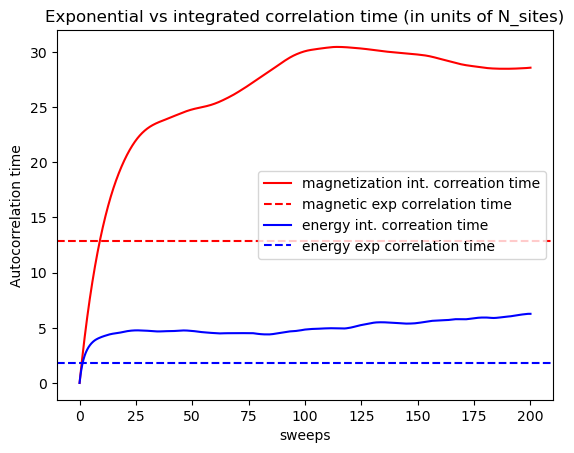

In [ ]:
xrange = np.arange(time_stop)/N_sites
legend = ["magnetization int. correation time","magnetic exp correlation time", 
     "energy int. correation time","energy exp correlation time"]

fig, ax = plt.subplots(1,1)

ax.plot(xrange, Mag_corr_time_set/N_sites, color = "red")
ax.axhline(l_m, color = "red", linestyle="--")

ax.plot(xrange, E_corr_time_set/N_sites, color = "blue")
ax.axhline(l_e, color = "blue",linestyle = "--")

ax.set_xlabel("sweeps")
ax.set_ylabel("Autocorrelation time")
ax.title.set_text("Exponential vs integrated correlation time (in units of N_sites)")
plt.legend(legend)
ax.title
plt.show()

## Comparing Metropolis-Hastings, Wolff, and Heatbath:

In [ ]:
from time import time

In [ ]:
L,T,H = 8, 3, 0
N_sites = L**2
N_burnin = 500*N_sites
N_iterations = 2*10**4*N_sites
time_stop = 200*N_sites

t0 = time()
trace_Metropolis = Metropolis_update(hotstart(L), beta, H, N_burnin + N_iterations)
print("time:", time()-t0)

time: 9.496404886245728


In [ ]:
t0 = time()
trace_Heatbath = Heatbath_update(hotstart(L), beta, H, N_burnin + N_iterations)
print("time:", time()-t0)

time: 9.329224348068237


In [ ]:
t0 = time()
trace_Wolff = Wolff_update(hotstart(L), beta, H, N_burnin + N_iterations)
print("time:", time()-t0)

time: 101.10729193687439


In [ ]:
# t0=time()
# E_autocorr_M=auto_corr(trace_Metropolis[:,1])
# E_autocorr_H=auto_corr(trace_Heatbath[:,1])
# E_autocorr_W=auto_corr(trace_Wolff[:,1])
# t1=time()
# print(f"Total computation time: {t1-t0}")

In [ ]:
time_stop = 200*N_sites

t0 = time()
E_corr_time_set_M = int_corr_time_set(trace_Metropolis[:,1], time_stop)
E_corr_time_set_H = int_corr_time_set(trace_Heatbath[:,1], time_stop)
E_corr_time_set_W = int_corr_time_set(trace_Wolff[:,1], time_stop)
print(f"Total computation time: {time()-t0}")

Total computation time: 0.8095359802246094


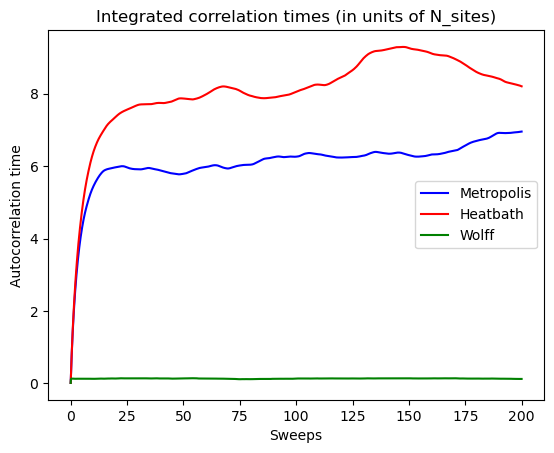

In [ ]:
fig, ax = plt.subplots(1,1)

xrange=np.arange(time_stop)/N_sites
legend = ["Metropolis", "Heatbath", "Wolff"]

ax.plot(xrange, E_corr_time_set_M/N_sites, color="blue")
ax.plot(xrange, E_corr_time_set_H/N_sites, color="red")
ax.plot(xrange, E_corr_time_set_W/N_sites, color="green")

ax.set_xlabel("Sweeps")
ax.set_ylabel("Autocorrelation time")
ax.title.set_text("Integrated correlation times (in units of N_sites)")
plt.legend(legend)
ax.title
plt.show()

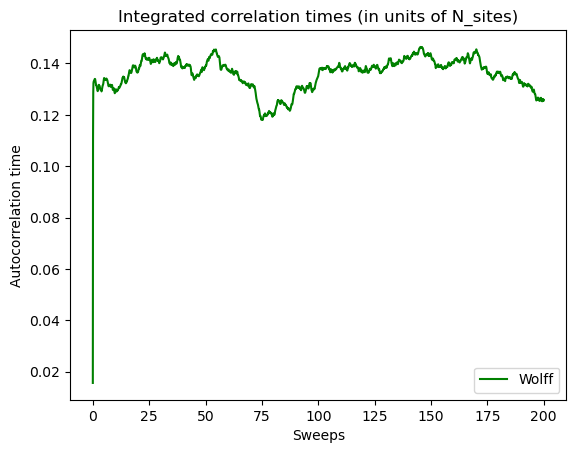

In [ ]:
fig, ax = plt.subplots(1,1)

xrange=np.arange(time_stop)/N_sites
legend = ["Wolff"]
ax.plot(xrange, E_corr_time_set_W/N_sites, color="green")

ax.set_xlabel("Sweeps")
ax.set_ylabel("Autocorrelation time")
ax.title.set_text("Integrated correlation times (in units of N_sites)")
plt.legend(legend)
ax.title
plt.show()

## Correlation length and temperature

In [ ]:
L,H = 4, 0
t_steps = 25
T_range = np.linspace(1,4,t_steps)

N_sites = L**2
N_burnin = 300*N_sites
N_iterations = 10**5*N_sites
time_stop = 200*N_sites

t0=time()
traces=[]
for t in T_range:
    beta=1/t
    trace = Metropolis_update(hotstart(L), beta, H, N_burnin + N_iterations)
    trace = trace[N_burnin:]
    traces.append(trace)

Mag_data=[np.abs(traces[i][:,0])/N_sites for i in range(len(traces))]
l_m=[exp_corr_len(auto_corr(Mag_data[i]))/N_sites for i in range(len(traces))]

E_data=[traces[i][:,1] for i in range(len(traces))]
l_e=[exp_corr_len(auto_corr(E_data[i]))/N_sites for i in range(len(traces))]

E_data=np.round(E_data,5)  ## Rounding off errors induced by non-zero H. Not sure fire but works for now

E_avg=[np.mean(E_data[i]) for i in range(len(traces))]
E_svar=[np.var(E_data[i], ddof=1)/len(E_data[i]) for i in range(len(traces))]
E_err=[1.96*np.sqrt(E_svar[i]) for i in range(len(traces))]

Mag_avg=[np.mean(Mag_data[i]) for i in range(len(traces))]
Mag_svar=[np.var(Mag_data[i], ddof=1)/len(Mag_data[i]) for i in range(len(traces))]
Mag_err=[1.96*np.sqrt(Mag_svar[i]) for i in range(len(traces))]

s_mean=[ np.mean(a) for a in E_data]
s_var=[np.var(e,ddof=1) for e in E_data]

# Compute exact results 

elist = [Ham(M,H) for M in config_gen(L)]
eset = sorted(set(elist))
    
E_mean=[sum( [ e*prob_E(L,t,H,e) for e in eset] ) for t in T_range]
E_var=[sum( [ (e-E_mean[i])**2*prob_Eset(L,T_range[i],H,[e]) for e in eset] ) for i in range(len(T_range))]

print("Computation time =" , time()-t0, " seconds, ", (time()-t0)/60, " minutes, or ", (time()-t0)/60**2, "hours.")

Computation time = 313.27180004119873  seconds,  5.221196667353312  minutes, or  0.08701994445588854 hours.


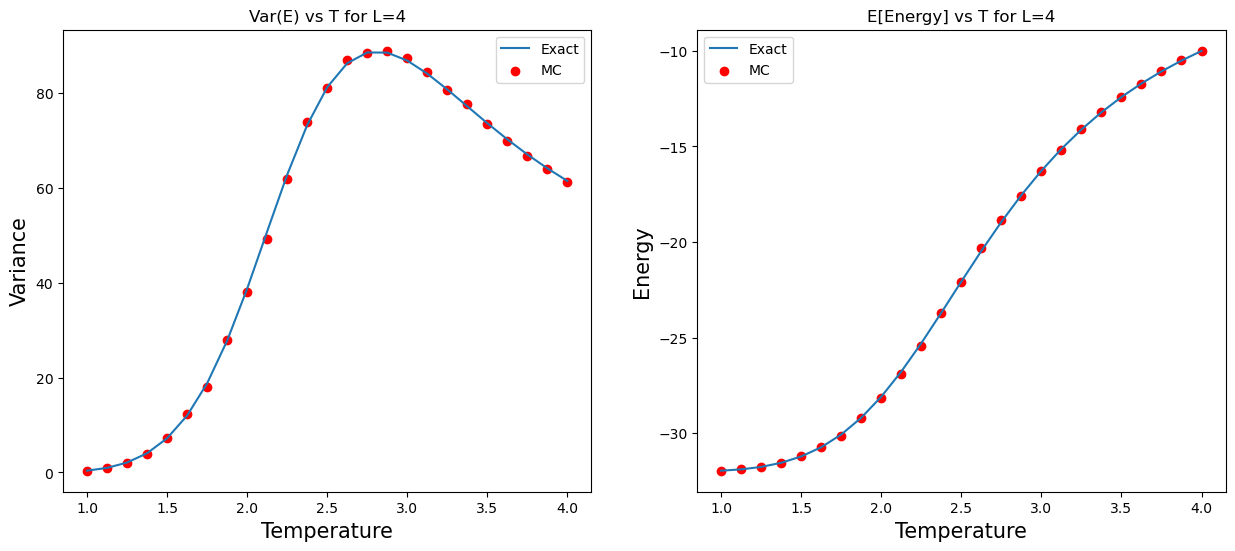

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].plot(T_range, E_var, label="Exact")
ax[0].scatter(T_range,s_var, color="red", label="MC")
ax[0].set_xlabel("Temperature",fontsize=15) 
ax[0].set_ylabel("Variance" ,fontsize=15)
ax[0].set_title(f"Var(E) vs T for L={L}")
ax[0].legend()

ax[1].plot(T_range, E_mean, label="Exact")
ax[1].scatter(T_range,s_mean, color="red", label="MC")
ax[1].set_xlabel("Temperature",fontsize=15) 
ax[1].set_ylabel("Energy" ,fontsize=15)
ax[1].set_title(f"E[Energy] vs T for L={L}")
ax[1].legend()
plt.show()

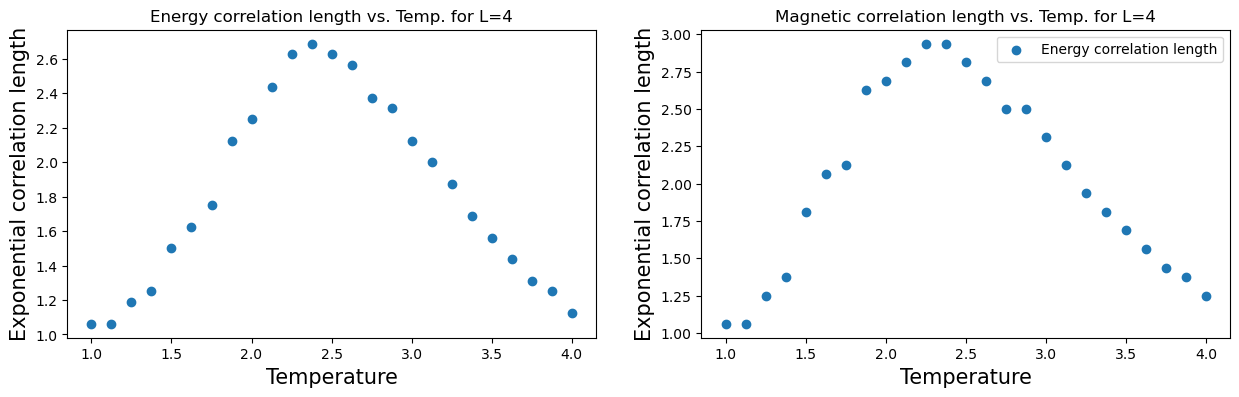

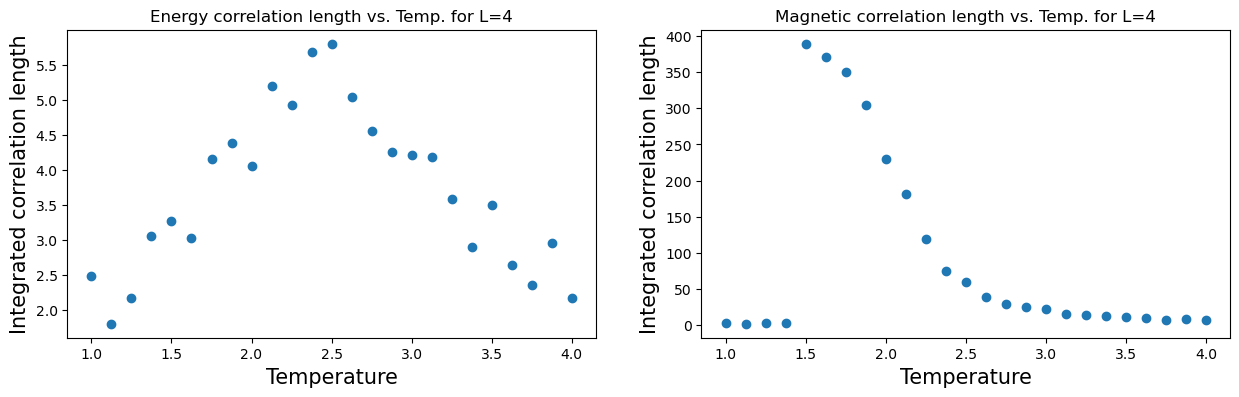

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].scatter(T_range,l_e)
ax[1].scatter(T_range,l_m)
ax[0].title.set_text(f"Energy correlation length vs. Temp. for L={L}")
ax[1].title.set_text(f"Magnetic correlation length vs. Temp. for L={L}")
[ax[i].set_xlabel("Temperature", fontsize=15) for i in range(len(ax))]
[ax[i].set_ylabel("Exponential correlation length" , fontsize=15) for i in range(len(ax))]
plt.legend(["Energy correlation length", "Magnetic correlation length"])
plt.show()

tau_t_M_set=[int_corr_time_set(traces[i][:,0],time_stop)/N_sites for i in range(len(traces))]
tau_t_E_set=[int_corr_time_set(traces[i][:,1],time_stop)/N_sites for i in range(len(traces))]
xrange=np.arange(time_stop)/N_sites

tau_M_set=[tau_t_M_set[i][-1] for i in range(len(tau_t_M_set))]
tau_E_set=[tau_t_E_set[i][-1] for i in range(len(tau_t_E_set))]

fig, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].scatter(T_range, tau_E_set)
ax[1].scatter(T_range, tau_M_set)
ax[0].title.set_text(f"Energy correlation length vs. Temp. for L={L}")
ax[1].title.set_text(f"Magnetic correlation length vs. Temp. for L={L}")
[ax[i].set_xlabel("Temperature", fontsize=15) for i in range(len(ax))]
[ax[i].set_ylabel("Integrated correlation length" , fontsize=15) for i in range(len(ax))]
plt.show()

In [ ]:
L,H = 8, 0
t_steps = 25
T_range = np.linspace(1,4,t_steps)

N_sites = L**2
N_burnin = 300*N_sites
N_iterations = 10**5*N_sites
time_stop = 200*N_sites

t0=time()
traces=[]
for t in T_range:
    beta=1/t
    trace = Metropolis_update(hotstart(L), beta, H, N_burnin + N_iterations)
    trace = trace[N_burnin:]
    traces.append(trace)

Mag_data = [np.abs(traces[i][:,0])/N_sites for i in range(len(traces))]
l_m = [exp_corr_len(auto_corr(Mag_data[i]))/N_sites for i in range(len(traces))]

E_data = [traces[i][:,1] for i in range(len(traces))]
l_e = [exp_corr_len(auto_corr(E_data[i]))/N_sites for i in range(len(traces))]

E_data = np.round(E_data,5)  ## Rounding off errors induced by non-zero H. Not sure fire but works for now

E_avg = [np.mean(E_data[i]) for i in range(len(traces))]
E_svar = [np.var(E_data[i], ddof=1)/len(E_data[i]) for i in range(len(traces))]
E_err = [1.96*np.sqrt(E_svar[i]) for i in range(len(traces))]

Mag_avg = [np.mean(Mag_data[i]) for i in range(len(traces))]
Mag_svar = [np.var(Mag_data[i], ddof=1)/len(Mag_data[i]) for i in range(len(traces))]
Mag_err = [1.96*np.sqrt(Mag_svar[i]) for i in range(len(traces))]

s_mean = [ np.mean(a) for a in E_data]
s_var = [np.var(e,ddof=1) for e in E_data]

# Compute exact results 

# elist = [Ham(M,H) for M in config_gen(L)]
# eset = sorted(set(elist))
    
# E_mean = [sum( [ e*prob_E(L,t,H,e) for e in eset] ) for t in T_range]
# E_var = [sum( [ (e-E_mean[i])**2*prob_Eset(L,T_range[i],H,[e]) for e in eset] ) for i in range(len(T_range))]

print("Computation time =" , time()-t0, " seconds, ", (time()-t0)/60, " minutes, or ", (time()-t0)/60**2, "hours.")

Computation time = 1238.328115940094  seconds,  20.6388020157814  minutes, or  0.3439800335963567 hours.


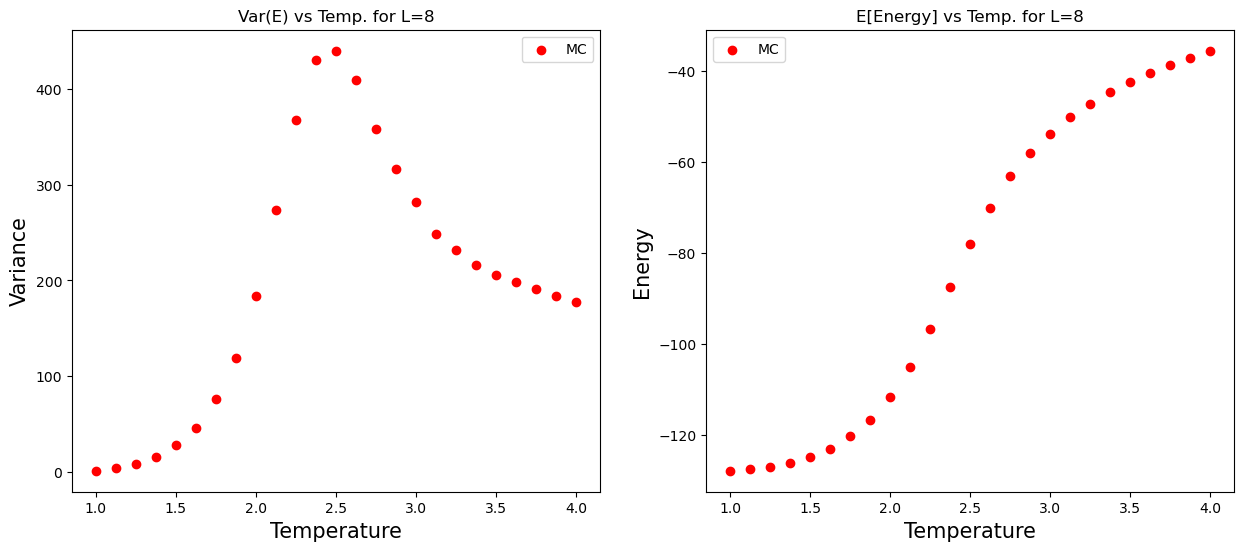

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].scatter(T_range,s_var, color="red", label="MC")
ax[0].set_xlabel("Temperature",fontsize=15) 
ax[0].set_ylabel("Variance" ,fontsize=15)
ax[0].set_title(f"Var(E) vs Temp. for L={L}")
ax[0].legend()

ax[1].scatter(T_range,s_mean, color="red", label="MC")
ax[1].set_xlabel("Temperature",fontsize=15) 
ax[1].set_ylabel("Energy" ,fontsize=15)
ax[1].set_title(f"E[Energy] vs Temp. for L={L}")
ax[1].legend()
plt.show()

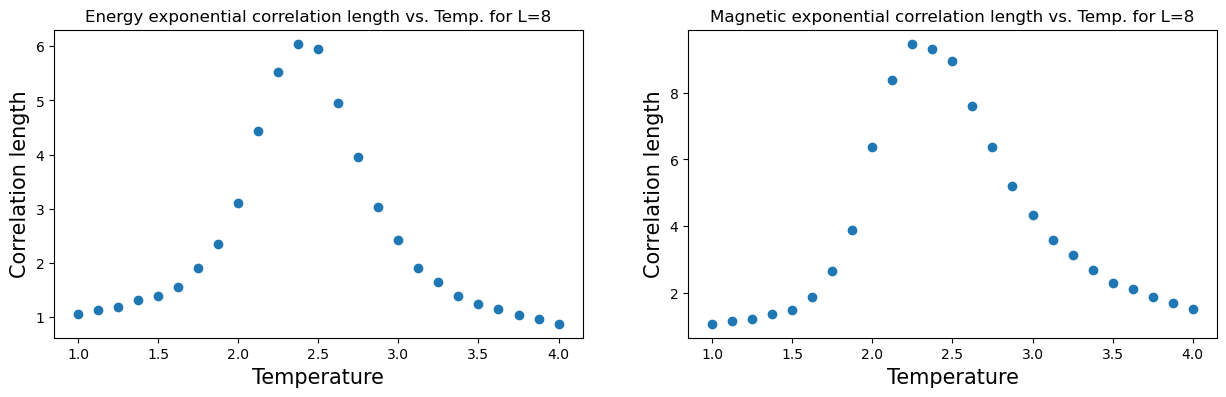

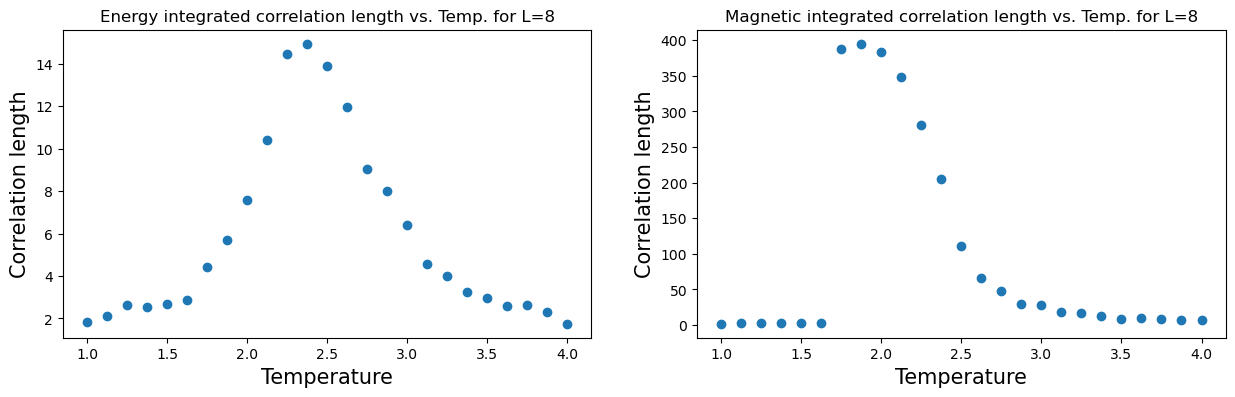

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].scatter(T_range, l_e)
ax[1].scatter(T_range, l_m)
ax[0].title.set_text(f"Energy exponential correlation length vs. Temp. for L={L}")
ax[1].title.set_text(f"Magnetic exponential correlation length vs. Temp. for L={L}")
[ax[i].set_xlabel("Temperature", fontsize=15) for i in range(len(ax))]
[ax[i].set_ylabel("Correlation length" , fontsize=15) for i in range(len(ax))]
plt.show()

tau_t_M_set=[int_corr_time_set(traces[i][:,0],time_stop)/N_sites for i in range(len(traces))]
tau_t_E_set=[int_corr_time_set(traces[i][:,1],time_stop)/N_sites for i in range(len(traces))]
xrange=np.arange(time_stop)/N_sites

tau_M_set=[tau_t_M_set[i][-1] for i in range(len(tau_t_M_set))]
tau_E_set=[tau_t_E_set[i][-1] for i in range(len(tau_t_E_set))]

fig, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].scatter(T_range, tau_E_set)
ax[1].scatter(T_range, tau_M_set)
ax[0].title.set_text(f"Energy integrated correlation length vs. Temp. for L={L}")
ax[1].title.set_text(f"Magnetic integrated correlation length vs. Temp. for L={L}")
[ax[i].set_xlabel("Temperature", fontsize=15) for i in range(len(ax))]
[ax[i].set_ylabel("Correlation length" , fontsize=15) for i in range(len(ax))]
plt.show()